# Proyecto Final Data Science- CoderHouse

**Equipo**

* David Alejandro Sanabria
* Patricia Mariel Frias
* Marco Vinicio Altamirano F

**Tutor**
* Cristian Velazquez

# Índice


<br>

- [Introducción](#Introducción)
<br>

- [Diccionario de Variables](#Diccionario-de-Variables)
<br>
- [Librerías](#Librerías)
<br>
- [Carga de datos](#Carga-de-datos)
<br>
- [Limpieza y preparación de los datos](#Limpieza-y-preparación-de-los-datos)
<br>
- [Analisis de los datos](#Análisis-de-los-datos)
<br>
- Implementacion de Modelos
<br>
- [-- Modelo Arima/Datos Diarios](#----Modelo-Arima/Datos-Diarios)
<br>
- [-- Auto Arima/Datos Diarios](#----Auto-Arima/Datos-Diarios)
<br>
- [-- Modelo Arima/Datos Semanales](#----Modelo-Arima/Datos-Semanales)
<br>
- [-- Auto Arima/Datos Semanales](#----Auto-Arima/Datos-Semanales)
<br>
- [-- Modelo Sarima/Datos Semanales](#----Modelo-Sarima/Datos-Semanales)


# **Introducción**

En este proyecto se trabajará con un Dataset provisto por Kaggle. En el siguiente link puede encontrarse el dataset: 
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

El Dataset bajo análisis incluye información de aproximadamente 100 mil órdenes de compra abarcando el período 2016 a 2018 realizadas en múltiples mercados en Brasil. Dicha base contiene los pedidos discriminados por categoría, indicando el precio de los mismos, así como también el costo del transporte. Con ello, es posible calcular el monto de ventas/costos y cantidad de pedidos en forma mensual y anual,y a su vez segregarlos por Ciudad/Estado.

El objetivo de este trabajo es poder implementar un algoritmo predictivo de machine learning que permita conocer de manera precisa las ventas mensuales futuras.

El problema específico radica en la posibilidad de contar con una proyección de ventas que permita tener una estimación de la rentabilidad del negocio y así definir estrategias comerciales para lograr una mejor atención al cliente, mejorar la administración de las sucursales y gestionar eficientes campañas de marketing.
 

* Nombre del archivo: Ventas3 (Base de datos limpia la cual se extrajo de las bases de datos de Olist)
* Variable Target: FH_Entrega, Estatus_Pedido.

# **Diccionario de Variables**

A continuación se brinda el listado de variables utilizadas en el proyecto:

df_ventas: DataFrame, resultado de la lectura de seis dataset proporcionados por la empresa Olist, con el que se trabajará a lo largo del proyecto. Tipo de dato: DataFrame.

Ventas:se trata de un DataFrame que sòlo considera las ventas concretadas con la entrega del producto. El agrupamiento por año se realiza utilizando la media de todos los valores del año. Tipo de dato: DataFrame

Year, Meses,Dia, Periodo,aaa_mm_dd,Semana, Year_Seamana: se trata variables creadas con el fin de poder determinar la existencia de tendencia y estacionalidad en las ventas diarias. Tipo de dato: Date

'Id_Pedidos': identificación única del pedido realizada por los consumidores. Tipo de Dato: string      
'Precio_Producto': Precio real de los productos solicitados. Tipo de Dato: float       
'Precio_Flete': Tarifa por entregar un producto de un punto a otro. Tipo de Dato: float       
'Categoria_Producto': Nombre de la categoría de producto. Tipo de Dato: string          
 'Estatus_Pedido': estado del pedido realizado, es decir, entregado, enviado, etc. Tipo de Dato: string       
 'FH_Pedido': Marca de tiempo de la compra.Tipo de Dato: date
'FH_Aprobacion': Marca de tiempo de la aprobación del pedido. Tipo de Dato: date
'FH_Entrega': fecha en que el cliente recibió el producto. Tipo de Dato: date
 'F_Estimada_Entrega': fecha estimada de entrega de los productos. Tipo de Dato: date
'Ciudad': Nombre de la Ciudad desde donde se realiza el pedido. Tipo de Dato: string          
'Estado': Código del Estado desde donde se realiza el pedido (Ex-sao paulo-SP). Tipo de Dato: string        
'Calificacion': puntuación de revisión otorgada por el cliente para cada pedido en una escala de 1 a 5. . Tipo de Dato: Integer

# **Librerías**

Las siguientes importaciones están divididas por secciones acordes a su rol en la notebook

In [2]:
# Librerías numéricas, científicas y de ciencia de datos
#===========================================================================
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # for operations on dataframes
from scipy import stats # for optimization, linear algebra, integration, interpolation
import pandas_profiling as pp # exploratory data analysis EDA
import datetime # for manupulating time and date columns
import warnings
warnings.filterwarnings("ignore")# for warning control


#Visualización de datos
#===========================================================================
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from pandas.plotting import autocorrelation_plot


#Importaciones de Sklearn 
#===========================================================================

#Data Preprocessing
from sklearn.cluster import KMeans #for clustering and evaluation
from sklearn.preprocessing import StandardScaler # For handling categorical column and scaling numeric columns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # Regresion Logistica
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import mean_squared_error
from math import sqrt

#Importaciones de Statsmodels 
#===========================================================================

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from numpy import log
import statsmodels as sm
import statsmodels.api as sm

#Otras Importaciones
#===========================================================================
import pmdarima as pm
from matplotlib.widgets import Slider, Button



# Carga de datos

In [3]:
# Cargar los datos sin procesar
#===========================================================================
df_clientes = pd.read_csv('olist_customers_dataset.csv')
df_pedidos = pd.read_csv('olist_orders_dataset.csv')
df_productos_en_pedidos = pd.read_csv('olist_order_items_dataset.csv')
df_productos = pd.read_csv('olist_products_dataset.csv')
df_calificaciones = pd.read_csv('olist_order_reviews_dataset.csv')
df_categorias = pd.read_csv("product_category_name_translation.csv")

In [4]:
# Exploración de los campos de la tabla y tipos de datos
#===========================================================================
df_clientes.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [5]:
# Exploración de los campos de la tabla y tipos de datos
#===========================================================================
df_pedidos.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [6]:
# Exploración de los campos de la tabla y tipos de datos
#===========================================================================
df_productos_en_pedidos.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [7]:
# Exploración de los campos de la tabla y tipos de datos
#===========================================================================
df_categorias.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

In [8]:
# Exploración de los campos de la tabla y tipos de datos
#===========================================================================
df_productos.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [9]:
# Exploración de los campos de la tabla y tipos de datos
#===========================================================================
df_calificaciones.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

# Limpieza y preparación de los datos

**Data Wrangling y EDA**

In [10]:
# Aplicación de Join para agregar a Productos información del pedido
#===========================================================================
df_productos_comprados = pd.merge(
    df_productos_en_pedidos[['order_id','product_id','price','freight_value']],
    df_productos[['product_id','product_category_name']], on=['product_id'])
df_productos_comprados = df_productos_comprados.merge(df_categorias[['product_category_name']], on=["product_category_name"])

In [11]:
# Aplicación de Join para agregar la informacón del pedido
#===========================================================================
df_pedidos_productos = pd.merge(
    df_productos_comprados, 
    df_pedidos[['order_id','customer_id','order_status','order_purchase_timestamp','order_approved_at',
                'order_delivered_customer_date','order_estimated_delivery_date']], on=['order_id'])


In [12]:
# Aplicación de Join para agregar la información del cliente
#===========================================================================
df_pedidos_clientes = pd.merge(
    df_pedidos_productos,
    df_clientes[['customer_id','customer_city','customer_state']],
    on=['customer_id'])


In [13]:
# Aplicación de Join para agregar las calificaciones
#===========================================================================
df_ventas = pd.merge(df_pedidos_clientes,df_calificaciones[['order_id','review_score']], on=['order_id'])

In [14]:
# Depuración y definición del DataFrame df_ventas
#===========================================================================
df_ventas = df_ventas.drop(['product_id','customer_id'], axis=1)
df_ventas = df_ventas.rename(columns={'order_id':'Id_Pedidos',
                                      'price':'Precio_Producto',  
                                      'freight_value':'Precio_Flete',
                                      'product_category_name':'Categoria_Producto',
                                      'order_status':'Estatus_Pedido',
                                      'order_purchase_timestamp':'FH_Pedido',
                                      'order_approved_at':'FH_Aprobacion',
                                      'order_delivered_customer_date':'FH_Entrega',
                                      'order_estimated_delivery_date':'F_Estimada_Entrega',
                                      'customer_city':'Ciudad',
                                      'customer_state':'Estado',
                                      'review_score':'Calificacion'})

In [15]:
#Variables del dataset
#===========================================================================
df_ventas.columns

Index(['Id_Pedidos', 'Precio_Producto', 'Precio_Flete', 'Categoria_Producto',
       'Estatus_Pedido', 'FH_Pedido', 'FH_Aprobacion', 'FH_Entrega',
       'F_Estimada_Entrega', 'Ciudad', 'Estado', 'Calificacion'],
      dtype='object')

In [16]:
# Exploración de los primeros 5 registros del dataset
#===========================================================================
df_ventas.head()

,Id_Pedidos,Precio_Producto,Precio_Flete,Categoria_Producto,Estatus_Pedido,FH_Pedido,FH_Aprobacion,FH_Entrega,F_Estimada_Entrega,Ciudad,Estado,Calificacion
0,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,cool_stuff,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00,campos dos goytacazes,RJ,5
1,130898c0987d1801452a8ed92a670612,55.9,17.96,cool_stuff,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-13 20:39:29,2017-07-26 00:00:00,jatai,GO,5
2,532ed5e14e24ae1f0d735b91524b98b9,64.9,18.33,cool_stuff,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-06-04 18:34:26,2018-06-07 00:00:00,belo horizonte,MG,4
3,6f8c31653edb8c83e1a739408b5ff750,58.9,16.17,cool_stuff,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-09 21:26:33,2017-08-25 00:00:00,sao jose dos pinhais,PR,5
4,7d19f4ef4d04461989632411b7e588b9,58.9,13.29,cool_stuff,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-24 20:04:21,2017-09-01 00:00:00,conselheiro lafaiete,MG,5


In [17]:
#Información del dataset
#===========================================================================
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id_Pedidos          110750 non-null  object 
 1   Precio_Producto     110750 non-null  float64
 2   Precio_Flete        110750 non-null  float64
 3   Categoria_Producto  110750 non-null  object 
 4   Estatus_Pedido      110750 non-null  object 
 5   FH_Pedido           110750 non-null  object 
 6   FH_Aprobacion       110736 non-null  object 
 7   FH_Entrega          108457 non-null  object 
 8   F_Estimada_Entrega  110750 non-null  object 
 9   Ciudad              110750 non-null  object 
 10  Estado              110750 non-null  object 
 11  Calificacion        110750 non-null  int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 11.0+ MB


In [18]:
# Conversión del tipo de datos de las variables fecha, de Object a Datetime
#===========================================================================
df_ventas['FH_Pedido'] = df_ventas['FH_Pedido'].astype('datetime64')
df_ventas['FH_Aprobacion'] = df_ventas['FH_Aprobacion'].astype('datetime64')
df_ventas['FH_Entrega'] = df_ventas['FH_Entrega'].astype('datetime64',errors='ignore')
df_ventas['F_Estimada_Entrega'] = df_ventas['F_Estimada_Entrega'].astype('datetime64',errors='ignore')

In [19]:
# Validando existencia de valores nulos
#===========================================================================
df_ventas.isnull().sum().sort_values(ascending=False)

FH_Entrega            2293
FH_Aprobacion           14
Id_Pedidos               0
Precio_Producto          0
Precio_Flete             0
Categoria_Producto       0
Estatus_Pedido           0
FH_Pedido                0
F_Estimada_Entrega       0
Ciudad                   0
Estado                   0
Calificacion             0
dtype: int64

In [20]:
# Reemplazo de valores nulos
#===========================================================================
df_ventas['FH_Aprobacion'].fillna(df_ventas['FH_Pedido'], inplace=True)
df_ventas['FH_Entrega'].fillna(df_ventas['F_Estimada_Entrega'], inplace=True)

In [21]:
# Validando existencia de valores nulos
#===========================================================================
df_ventas.isnull().sum().sort_values(ascending=False)

Id_Pedidos            0
Precio_Producto       0
Precio_Flete          0
Categoria_Producto    0
Estatus_Pedido        0
FH_Pedido             0
FH_Aprobacion         0
FH_Entrega            0
F_Estimada_Entrega    0
Ciudad                0
Estado                0
Calificacion          0
dtype: int64

In [22]:
#Información del dataset
#===========================================================================
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Id_Pedidos          110750 non-null  object        
 1   Precio_Producto     110750 non-null  float64       
 2   Precio_Flete        110750 non-null  float64       
 3   Categoria_Producto  110750 non-null  object        
 4   Estatus_Pedido      110750 non-null  object        
 5   FH_Pedido           110750 non-null  datetime64[ns]
 6   FH_Aprobacion       110750 non-null  datetime64[ns]
 7   FH_Entrega          110750 non-null  datetime64[ns]
 8   F_Estimada_Entrega  110750 non-null  datetime64[ns]
 9   Ciudad              110750 non-null  object        
 10  Estado              110750 non-null  object        
 11  Calificacion        110750 non-null  int64         
dtypes: datetime64[ns](4), float64(2), int64(1), object(5)
memory usage: 11.0+ MB


In [23]:
# Validando existencia de filas duplicadas
#===========================================================================
df_ventas.duplicated(keep='last')

0         False
1         False
2         False
3         False
4         False
          ...  
110745    False
110746    False
110747    False
110748    False
110749    False
Length: 110750, dtype: bool

In [24]:
# Detección de filas duplicadas
#===========================================================================
duplicated_values= df_ventas[df_ventas.duplicated(keep=False)]
duplicated_values

,Id_Pedidos,Precio_Producto,Precio_Flete,Categoria_Producto,Estatus_Pedido,FH_Pedido,FH_Aprobacion,FH_Entrega,F_Estimada_Entrega,Ciudad,Estado,Calificacion
14,45c780334bc32cb77559a65c5f171160,25.00,23.09,cool_stuff,delivered,2017-12-20 19:20:25,2017-12-22 02:39:37,2018-01-03 14:07:22,2018-01-22,para de minas,MG,1
15,45c780334bc32cb77559a65c5f171160,25.00,23.09,cool_stuff,delivered,2017-12-20 19:20:25,2017-12-22 02:39:37,2018-01-03 14:07:22,2018-01-22,para de minas,MG,1
26,dc12f9e8414131e62897902a78e0286e,25.00,17.92,cool_stuff,delivered,2017-12-15 13:41:41,2017-12-15 14:52:47,2017-12-27 19:44:07,2018-01-18,mariana,MG,3
27,dc12f9e8414131e62897902a78e0286e,25.00,17.92,cool_stuff,delivered,2017-12-15 13:41:41,2017-12-15 14:52:47,2017-12-27 19:44:07,2018-01-18,mariana,MG,3
540,ce338e075a36068051ecff6802ab64ef,89.99,8.98,cool_stuff,delivered,2018-05-09 11:31:26,2018-05-09 11:51:17,2018-05-11 19:02:19,2018-05-18,osasco,SP,5
...,...,...,...,...,...,...,...,...,...,...,...,...
110710,9b951f6f81b73f9ee291b9735e6fe993,39.90,25.63,fashion_esporte,delivered,2017-09-28 17:34:38,2017-09-29 02:14:28,2017-10-20 18:02:46,2017-11-03,parauapebas,PA,4
110711,9b951f6f81b73f9ee291b9735e6fe993,39.90,25.63,fashion_esporte,delivered,2017-09-28 17:34:38,2017-09-29 02:14:28,2017-10-20 18:02:46,2017-11-03,parauapebas,PA,4
110712,9b951f6f81b73f9ee291b9735e6fe993,39.90,25.63,fashion_esporte,delivered,2017-09-28 17:34:38,2017-09-29 02:14:28,2017-10-20 18:02:46,2017-11-03,parauapebas,PA,4
110732,3821dc9ac1b25bed42324d0885b0a930,140.00,27.06,la_cuisine,delivered,2018-04-17 21:01:58,2018-04-17 21:15:10,2018-04-23 18:01:57,2018-05-09,sao paulo,SP,1


In [25]:
# Creación de un nuevo dataframe sin filas duplicadas y restablecimiento de índices
#===========================================================================
df_ventas2=df_ventas.drop_duplicates()
df_ventas2.reset_index(drop=True, inplace=True)
df_ventas2

,Id_Pedidos,Precio_Producto,Precio_Flete,Categoria_Producto,Estatus_Pedido,FH_Pedido,FH_Aprobacion,FH_Entrega,F_Estimada_Entrega,Ciudad,Estado,Calificacion
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,cool_stuff,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29,campos dos goytacazes,RJ,5
1,130898c0987d1801452a8ed92a670612,55.90,17.96,cool_stuff,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-13 20:39:29,2017-07-26,jatai,GO,5
2,532ed5e14e24ae1f0d735b91524b98b9,64.90,18.33,cool_stuff,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-06-04 18:34:26,2018-06-07,belo horizonte,MG,4
3,6f8c31653edb8c83e1a739408b5ff750,58.90,16.17,cool_stuff,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-09 21:26:33,2017-08-25,sao jose dos pinhais,PR,5
4,7d19f4ef4d04461989632411b7e588b9,58.90,13.29,cool_stuff,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-24 20:04:21,2017-09-01,conselheiro lafaiete,MG,5
...,...,...,...,...,...,...,...,...,...,...,...,...
99579,3da4b0f0c89bb8fee8a810459e641414,110.00,8.96,fashion_roupa_infanto_juvenil,delivered,2017-06-08 16:46:33,2017-06-08 18:20:19,2017-06-13 13:23:01,2017-06-23,sao paulo,SP,5
99580,9fa3a005f89a187501fa1bd63d6125fb,39.99,14.10,fashion_roupa_infanto_juvenil,delivered,2017-10-08 23:51:49,2017-10-09 00:17:50,2017-10-16 21:59:33,2017-11-08,sao paulo,SP,5
99581,cab08f0417a702d0f4782ec02356a4ac,89.99,17.07,fashion_roupa_infanto_juvenil,delivered,2017-09-30 18:54:53,2017-10-03 04:28:12,2017-10-30 12:37:42,2017-11-01,macaubas,BA,5
99582,cb53f0b6e8f9082a9f5a113765dd1236,89.99,7.49,fashion_roupa_infanto_juvenil,delivered,2018-06-03 22:34:58,2018-06-03 22:50:09,2018-06-05 21:52:02,2018-06-28,sao paulo,SP,5


In [26]:
#Resumen rápido de las estadísticas de datos
#===========================================================================
df_ventas2.describe()

,Precio_Producto,Precio_Flete,Calificacion
count,99584.000000,99584.000000,99584.000000
mean,124.744862,20.167933,4.081569
std,187.671684,15.918764,1.348826
min,0.850000,0.000000,1.000000
25%,40.990000,13.180000,4.000000
50%,79.000000,16.360000,5.000000
75%,139.200000,21.300000,5.000000
max,6735.000000,409.680000,5.000000


In [28]:
#Identificación de posibles estados del pedido
#===========================================================================
df_ventas2["Estatus_Pedido"].value_counts()

delivered      97518
shipped         1026
canceled         432
invoiced         312
processing       287
unavailable        7
approved           2
Name: Estatus_Pedido, dtype: int64

In [29]:
# Identificación del total de órdenes de compra no concretadas
#===========================================================================
ordenes_no_entregadas = df_ventas2[df_ventas2["Estatus_Pedido"] != 'delivered']
ordenes_no_entregadas ["Estatus_Pedido"].value_counts().sum()

2066

In [30]:
# Creación de Dataframe que sólo incluye pedidos entregados
#===========================================================================
Ventas= df_ventas2[df_ventas2['Estatus_Pedido'] =='delivered']
Ventas

,Id_Pedidos,Precio_Producto,Precio_Flete,Categoria_Producto,Estatus_Pedido,FH_Pedido,FH_Aprobacion,FH_Entrega,F_Estimada_Entrega,Ciudad,Estado,Calificacion
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,cool_stuff,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29,campos dos goytacazes,RJ,5
1,130898c0987d1801452a8ed92a670612,55.90,17.96,cool_stuff,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-13 20:39:29,2017-07-26,jatai,GO,5
2,532ed5e14e24ae1f0d735b91524b98b9,64.90,18.33,cool_stuff,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-06-04 18:34:26,2018-06-07,belo horizonte,MG,4
3,6f8c31653edb8c83e1a739408b5ff750,58.90,16.17,cool_stuff,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-09 21:26:33,2017-08-25,sao jose dos pinhais,PR,5
4,7d19f4ef4d04461989632411b7e588b9,58.90,13.29,cool_stuff,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-24 20:04:21,2017-09-01,conselheiro lafaiete,MG,5
...,...,...,...,...,...,...,...,...,...,...,...,...
99579,3da4b0f0c89bb8fee8a810459e641414,110.00,8.96,fashion_roupa_infanto_juvenil,delivered,2017-06-08 16:46:33,2017-06-08 18:20:19,2017-06-13 13:23:01,2017-06-23,sao paulo,SP,5
99580,9fa3a005f89a187501fa1bd63d6125fb,39.99,14.10,fashion_roupa_infanto_juvenil,delivered,2017-10-08 23:51:49,2017-10-09 00:17:50,2017-10-16 21:59:33,2017-11-08,sao paulo,SP,5
99581,cab08f0417a702d0f4782ec02356a4ac,89.99,17.07,fashion_roupa_infanto_juvenil,delivered,2017-09-30 18:54:53,2017-10-03 04:28:12,2017-10-30 12:37:42,2017-11-01,macaubas,BA,5
99582,cb53f0b6e8f9082a9f5a113765dd1236,89.99,7.49,fashion_roupa_infanto_juvenil,delivered,2018-06-03 22:34:58,2018-06-03 22:50:09,2018-06-05 21:52:02,2018-06-28,sao paulo,SP,5


In [31]:
#Evidenciar las caracteristicas de la base de datos
#===========================================================================
Ventas.dtypes

Id_Pedidos                    object
Precio_Producto              float64
Precio_Flete                 float64
Categoria_Producto            object
Estatus_Pedido                object
FH_Pedido             datetime64[ns]
FH_Aprobacion         datetime64[ns]
FH_Entrega            datetime64[ns]
F_Estimada_Entrega    datetime64[ns]
Ciudad                        object
Estado                        object
Calificacion                   int64
dtype: object

In [32]:
# Acotar a meses completos
#===========================================================================
Ventas = Ventas.query("FH_Entrega > '2016-11-01 00:00:00' and FH_Entrega < '2018-10-01 00:00:00'")

In [33]:
Ventas.shape

(97306, 12)

In [34]:
# Exploración de los campos de la tabla y tipos de datos
#===========================================================================
Ventas.dtypes

Id_Pedidos                    object
Precio_Producto              float64
Precio_Flete                 float64
Categoria_Producto            object
Estatus_Pedido                object
FH_Pedido             datetime64[ns]
FH_Aprobacion         datetime64[ns]
FH_Entrega            datetime64[ns]
F_Estimada_Entrega    datetime64[ns]
Ciudad                        object
Estado                        object
Calificacion                   int64
dtype: object

In [35]:

# Agregar 4 columnas una con el año, otra mes, otra con el día y una cuarta para almacenar periodo Año_mes
#===========================================================================
Ventas = Ventas.assign(Year = Ventas['FH_Entrega'].dt.year)
Ventas = Ventas.assign(Meses = Ventas['FH_Entrega'].dt.month)
Ventas = Ventas.assign(Dia = Ventas['FH_Entrega'].dt.day)
Ventas = Ventas.assign(Periodo = "0000_00")


In [36]:

# Cambiar los tipos de datos de año, mes día a texto para unirlos como cadena en la variable Periodo
#===========================================================================
Ventas['Year'] = Ventas['Year'].astype(str)
Ventas['Meses'] = Ventas['Meses'].astype(str)
Ventas['Dia'] = Ventas['Dia'].astype(str)


In [37]:
Ventas.groupby('Periodo')['Periodo'].count()

Periodo
0000_00    97306
Name: Periodo, dtype: int64

In [38]:
# Arreglar la columana meses para obtener ordenada la serie
#===========================================================================
Ventas['Meses'] = Ventas['Meses'].map({'1':'01','2':'02','3':'03','4':'04','5':'05','6':'06',
                                                 '7':'07','8':'08','9':'09','10':'10','11':'11','12':'12'
                                                })


In [39]:
# Armar la variable de periodos
#===========================================================================
Ventas['Periodo'] = Ventas[['Year','Meses']].agg("_".join, axis=1)

In [40]:
Ventas.groupby('Periodo')['Periodo'].count()

Periodo
2016_11      60
2016_12       3
2017_01     286
2017_02    1347
2017_03    2382
2017_04    1840
2017_05    3761
2017_06    3237
2017_07    3507
2017_08    4401
2017_09    3966
2017_10    4561
2017_11    4739
2017_12    7267
2018_01    6599
2018_02    5836
2018_03    6846
2018_04    7923
2018_05    7254
2018_06    6999
2018_07    5939
2018_08    8497
2018_09      56
Name: Periodo, dtype: int64

In [41]:
# Crear el perido diario
#===========================================================================
Ventas['Dia'] = Ventas['Dia'].map({'1':'01','2':'02','3':'03','4':'04','5':'05',
                                         '6':'06','7':'07','8':'08','9':'09','10':'10',
                                         '11':'11','12':'12','13':'13','14':'14','15':'15',
                                         '16':'16','17':'17','18':'18','19':'19','20':'20',
                                         '21':'21','22':'22','23':'23','24':'24','25':'25',
                                         '26':'26','27':'27','28':'28','29':'29','30':'30',
                                         '31':'31'
                                        })
Ventas = Ventas.assign(aaaa_mm_dd = "0000_00_00")
Ventas['aaaa_mm_dd'] = Ventas[['Year','Meses','Dia']].agg("_".join, axis = 1)


In [42]:
# Crear el periodo semanal
#===========================================================================
Ventas = Ventas.assign(Semana = Ventas['FH_Entrega'].dt.isocalendar().week)
Ventas = Ventas.assign(Year_Semana = "0000_00")
Ventas['Semana'] = Ventas['Semana'].map({
                                1:'01',2:'02',3:'03',4:'04',5:'05',6:'06',7:'07',8:'08',9:'09',10:'10'
                                ,11:'11',12:'12',13:'13',14:'14',15:'15',16:'16',17:'17',18:'18',19:'19',20:'20'
                                ,21:'21',22:'22',23:'23',24:'24',25:'25',26:'26',27:'27',28:'28',29:'29',30:'30'
                                ,31:'31',32:'32',33:'33',34:'34',35:'35',36:'36',37:'37',38:'38',39:'39',40:'40'
                                ,41:'41',42:'42',43:'43',44:'44',45:'45',46:'46',47:'47',48:'48',49:'49',50:'50'
                                ,51:'51',52:'52'})
Ventas['Year_Semana'] = Ventas[['Year','Semana']].agg("_".join, axis = 1)

In [43]:
Ventas

,Id_Pedidos,Precio_Producto,Precio_Flete,Categoria_Producto,Estatus_Pedido,FH_Pedido,FH_Aprobacion,FH_Entrega,F_Estimada_Entrega,Ciudad,Estado,Calificacion,Year,Meses,Dia,Periodo,aaaa_mm_dd,Semana,Year_Semana
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,cool_stuff,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29,campos dos goytacazes,RJ,5,2017,09,20,2017_09,2017_09_20,38,2017_38
1,130898c0987d1801452a8ed92a670612,55.90,17.96,cool_stuff,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-13 20:39:29,2017-07-26,jatai,GO,5,2017,07,13,2017_07,2017_07_13,28,2017_28
2,532ed5e14e24ae1f0d735b91524b98b9,64.90,18.33,cool_stuff,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-06-04 18:34:26,2018-06-07,belo horizonte,MG,4,2018,06,04,2018_06,2018_06_04,23,2018_23
3,6f8c31653edb8c83e1a739408b5ff750,58.90,16.17,cool_stuff,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-09 21:26:33,2017-08-25,sao jose dos pinhais,PR,5,2017,08,09,2017_08,2017_08_09,32,2017_32
4,7d19f4ef4d04461989632411b7e588b9,58.90,13.29,cool_stuff,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-24 20:04:21,2017-09-01,conselheiro lafaiete,MG,5,2017,08,24,2017_08,2017_08_24,34,2017_34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99579,3da4b0f0c89bb8fee8a810459e641414,110.00,8.96,fashion_roupa_infanto_juvenil,delivered,2017-06-08 16:46:33,2017-06-08 18:20:19,2017-06-13 13:23:01,2017-06-23,sao paulo,SP,5,2017,06,13,2017_06,2017_06_13,24,2017_24
99580,9fa3a005f89a187501fa1bd63d6125fb,39.99,14.10,fashion_roupa_infanto_juvenil,delivered,2017-10-08 23:51:49,2017-10-09 00:17:50,2017-10-16 21:59:33,2017-11-08,sao paulo,SP,5,2017,10,16,2017_10,2017_10_16,42,2017_42
99581,cab08f0417a702d0f4782ec02356a4ac,89.99,17.07,fashion_roupa_infanto_juvenil,delivered,2017-09-30 18:54:53,2017-10-03 04:28:12,2017-10-30 12:37:42,2017-11-01,macaubas,BA,5,2017,10,30,2017_10,2017_10_30,44,2017_44
99582,cb53f0b6e8f9082a9f5a113765dd1236,89.99,7.49,fashion_roupa_infanto_juvenil,delivered,2018-06-03 22:34:58,2018-06-03 22:50:09,2018-06-05 21:52:02,2018-06-28,sao paulo,SP,5,2018,06,05,2018_06,2018_06_05,23,2018_23


# Análisis de los datos

### - - Análisis Univariado

El análisis inicial se centra en evidenciar la cantidad de ordenes con estado entregado con el objetivo de analizar el comportamiento de las entregas (ventas completadas) por mes/año de los datos históricos.

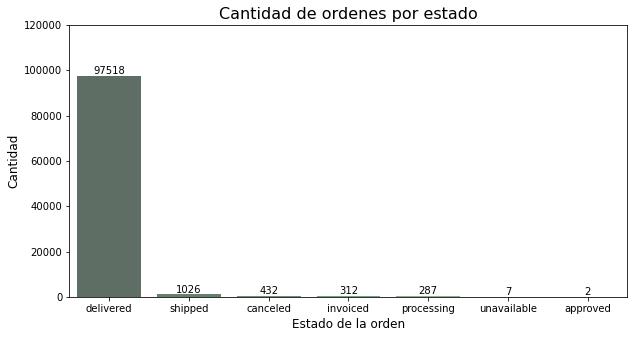

In [44]:
#Relación de las ordenes con el estado del pedido 

orderc = df_ventas2['Estatus_Pedido'].value_counts(ascending=False)
plt.figure(figsize=(10,5))
palette = sns.color_palette('Greens_d', len(orderc))
ax = sns.barplot(orderc.index, orderc.values, alpha=0.8 , palette=np.array(palette[::-1]))
plt.title('Cantidad de ordenes por estado', fontsize=16)
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Estado de la orden', fontsize=12)
plt.ylim(0,120000) 
ax.bar_label(ax.containers[0])
plt.show()

### - - Análisis Multivariado

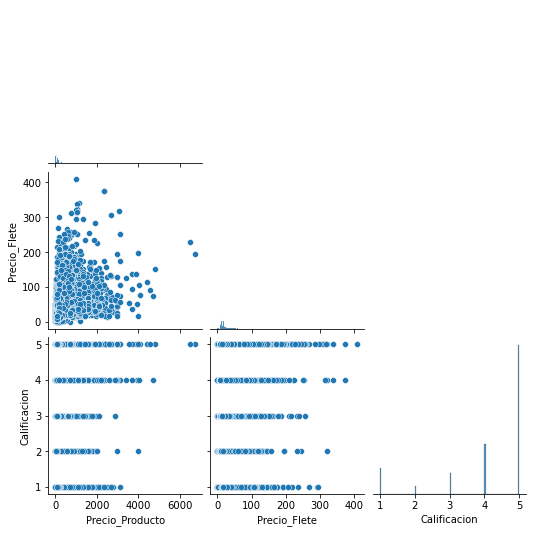

In [45]:
sns.pairplot(Ventas, corner=True)

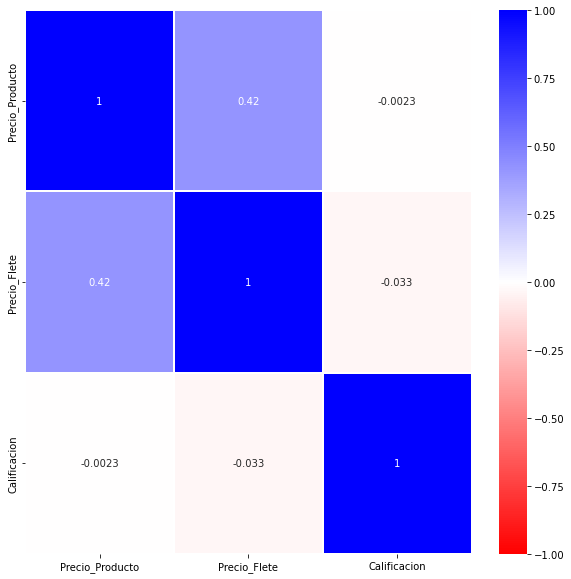

In [46]:
plt.figure(figsize=(10,10))

sns.heatmap(Ventas.corr(), annot=True, vmin=-1, vmax=1, cmap="bwr_r", linewidths=.4)

plt.show()


### - - Análisis serie de tiempo tendencia y estacionalidad 

Se nota inicialmente que la distribución de las ventas a través del tiempo, no tiene estacionalidad aunque tiene una tendencia por lo tanto tentativamente se debe proceder con un análisis Arima.

In [47]:
# Agrupación para Gráfica de ventas diarias
#===========================================================================
df_vd = Ventas.groupby('aaaa_mm_dd')['aaaa_mm_dd'].count()
df_vd 

aaaa_mm_dd
2016_11_01    8
2016_11_03    5
2016_11_04    4
2016_11_05    1
2016_11_07    8
             ..
2018_09_19    3
2018_09_20    1
2018_09_21    2
2018_09_25    1
2018_09_27    1
Name: aaaa_mm_dd, Length: 621, dtype: int64

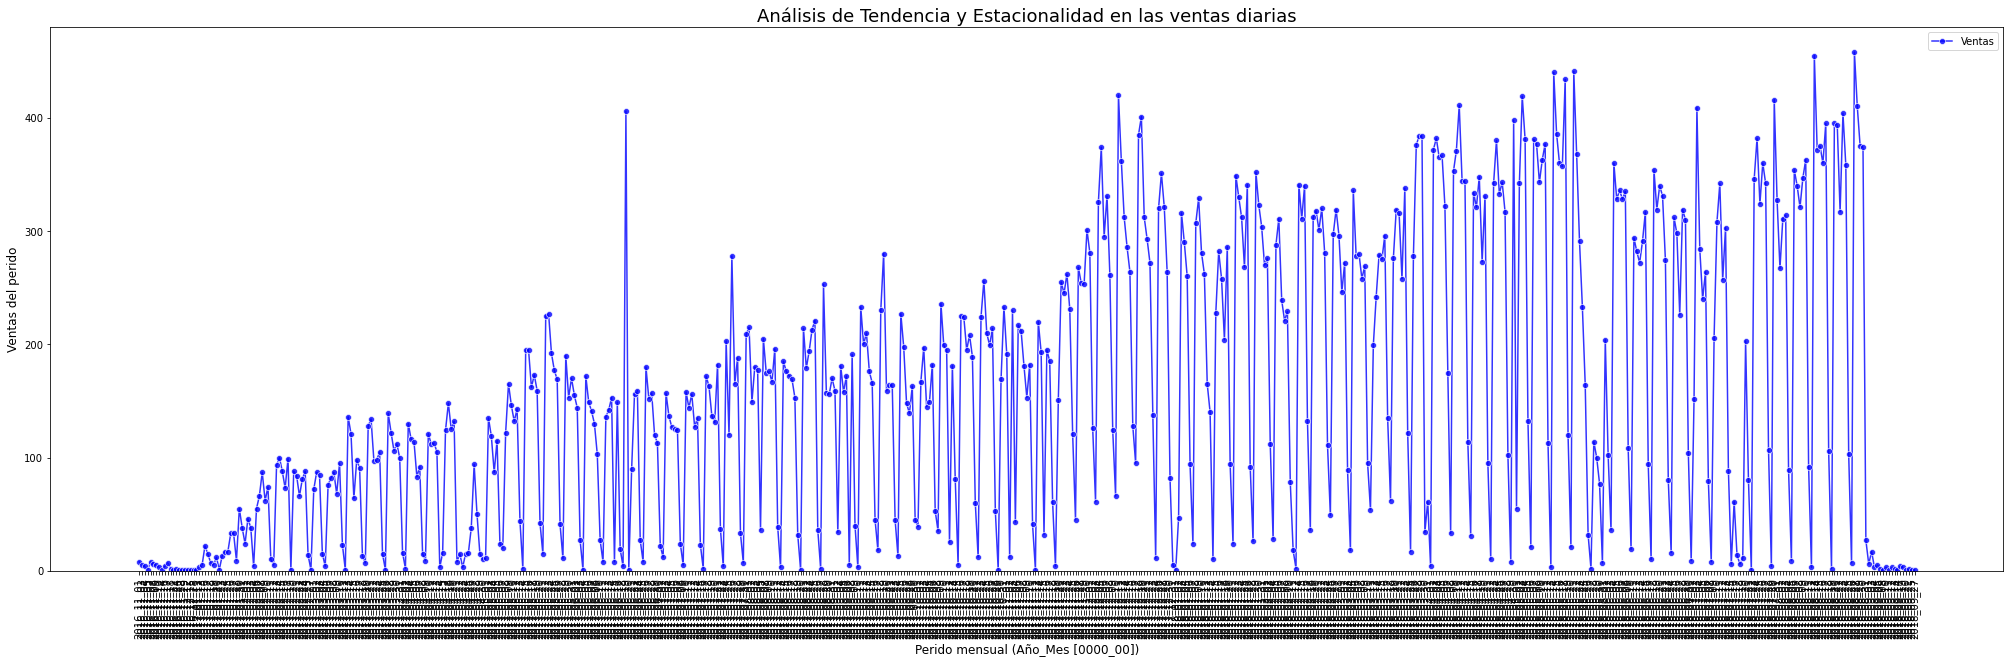

In [48]:
# Grafica de ventas diarias
#===========================================================================
plt.figure(figsize=(35,10))
ax = sns.lineplot(x = df_vd.index, y = df_vd.values, alpha = 0.8, linestyle = '-', marker = 'o', color = 'b', label = 'Ventas')
plt.title('Análisis de Tendencia y Estacionalidad en las ventas diarias', fontsize=18)
plt.ylabel('Ventas del perido', fontsize=12)
plt.xlabel('Perido mensual (Año_Mes [0000_00])', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,480) 
plt.legend()
plt.show()

In [49]:
# Gráfica de ventas semanales
#===========================================================================
df_vs = Ventas['Year_Semana'].value_counts() # No mantiene orden en los indices
df_vs = Ventas.groupby('Year_Semana')['Year_Semana'].count()
df_vs.describe()

count      97.000000
mean     1003.154639
std       631.156253
min         1.000000
25%       530.000000
50%       961.000000
75%      1560.000000
max      2118.000000
Name: Year_Semana, dtype: float64

In [50]:
# Eliminación de datos atípicos encontrados en la gráfica
#===========================================================================
df_vs = df_vs.drop(['2016_44','2016_45','2016_46','2016_47','2016_48','2016_50','2016_52','2018_36','2018_37','2018_38','2018_39'])
df_vs

Year_Semana
2017_02       9
2017_03      62
2017_04     122
2017_05     205
2017_06     359
           ... 
2018_31    1733
2018_32    1820
2018_33    2065
2018_34    1978
2018_35    1650
Name: Year_Semana, Length: 86, dtype: int64

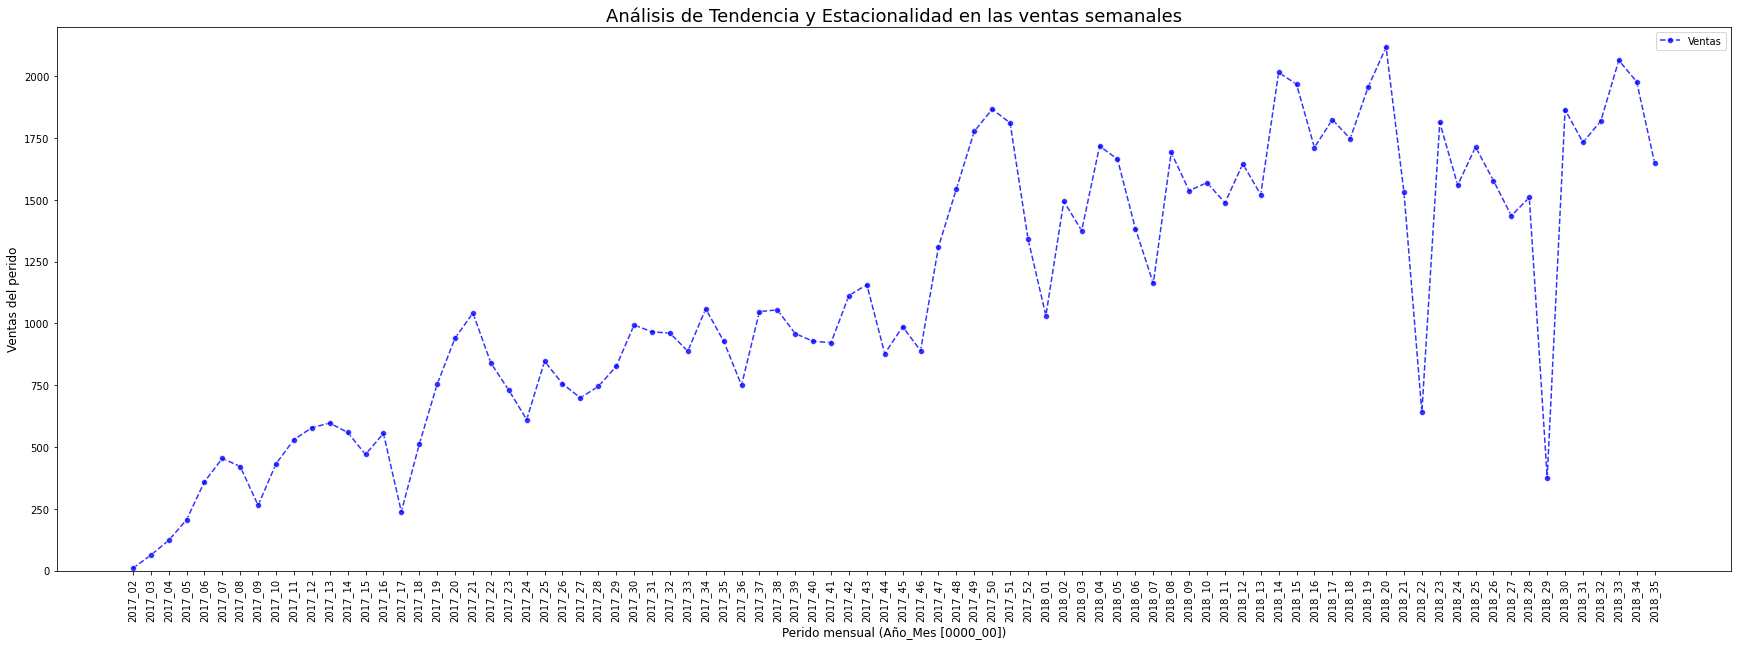

In [51]:
# Gráfica de ventas semanales
#===========================================================================
plt.figure(figsize=(30,10))
ax = sns.lineplot(x = df_vs.index, y = df_vs.values, alpha = 0.8, linestyle = '--', marker = 'o', color = 'b', label = 'Ventas')
plt.title('Análisis de Tendencia y Estacionalidad en las ventas semanales', fontsize=18)
plt.ylabel('Ventas del perido', fontsize=12)
plt.xlabel('Perido mensual (Año_Mes [0000_00])', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,2200) 
plt.legend()
plt.show()

In [52]:
# Se nombra la base de datos filtrada para graficarla y evideciar el comportamiento
#===========================================================================
datos_a = Ventas.groupby('Periodo')['Periodo'].count()
datos_a 

Periodo
2016_11      60
2016_12       3
2017_01     286
2017_02    1347
2017_03    2382
2017_04    1840
2017_05    3761
2017_06    3237
2017_07    3507
2017_08    4401
2017_09    3966
2017_10    4561
2017_11    4739
2017_12    7267
2018_01    6599
2018_02    5836
2018_03    6846
2018_04    7923
2018_05    7254
2018_06    6999
2018_07    5939
2018_08    8497
2018_09      56
Name: Periodo, dtype: int64

In [53]:
# Eliminación de datos atípicos encontrados en la gráfica
#===========================================================================
d_a = datos_a.drop(['2016_11','2016_12','2018_09'])
d_a

Periodo
2017_01     286
2017_02    1347
2017_03    2382
2017_04    1840
2017_05    3761
2017_06    3237
2017_07    3507
2017_08    4401
2017_09    3966
2017_10    4561
2017_11    4739
2017_12    7267
2018_01    6599
2018_02    5836
2018_03    6846
2018_04    7923
2018_05    7254
2018_06    6999
2018_07    5939
2018_08    8497
Name: Periodo, dtype: int64

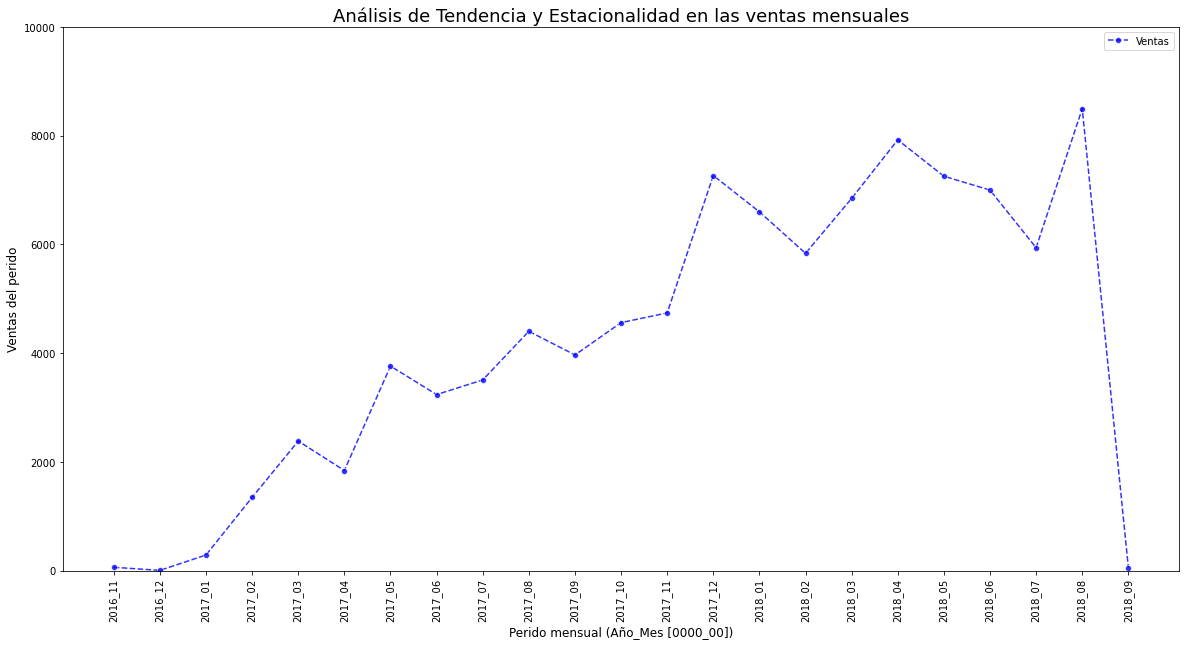

In [54]:
# Gráfica de ventas mensuales
#===========================================================================
d_a = datos_a 
plt.figure(figsize=(20,10))
ax = sns.lineplot(d_a.index, d_a.values, alpha=0.8, linestyle='--', marker='o', color='b', label='Ventas')
plt.title('Análisis de Tendencia y Estacionalidad en las ventas mensuales', fontsize=18)
plt.ylabel('Ventas del perido', fontsize=12)
plt.xlabel('Perido mensual (Año_Mes [0000_00])', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,10000) 
plt.legend()
plt.show()

# Implementación de Modelos

### - - Modelo Arima/Datos Diarios

In [55]:
# Identificar si la serie es estacional
result = adfuller(df_vd.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.459020
p-value: 0.125766


Valor de P- value es mayor a 0.05, por lo tanto se conclue que si hay estacionalidad en la serie de tiempo

### Parametro (d)

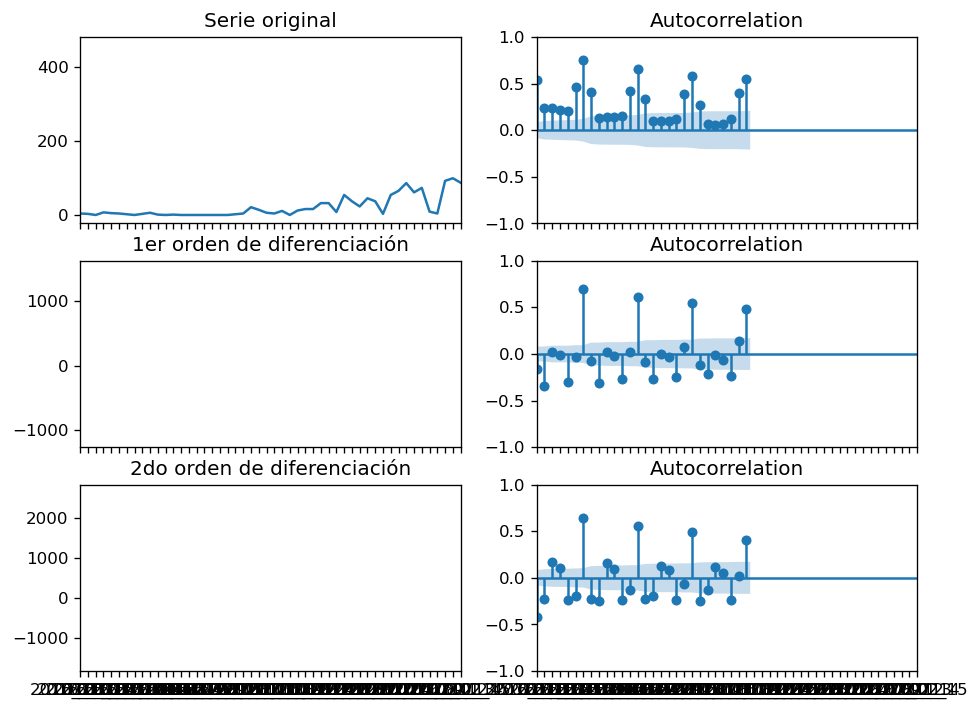

In [56]:
#Gráfico de autocorrelación

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

#Serie original
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_vd); axes[0, 0].set_title('Serie original')
axes[0,1].set_xlim([1,50])
plot_acf(df_vd, ax=axes[0, 1])


# Primera Diferenciación
axes[1, 0].plot(df_vs.diff()); axes[1, 0].set_title('1er orden de diferenciación')
plot_acf(df_vd.diff().dropna(), ax=axes[1, 1])

# Segunda Diferenciación
axes[2, 0].plot(df_vs.diff().diff()); axes[2, 0].set_title("2do orden de diferenciación")
plot_acf(df_vd.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Al evidenciar el primer orden de difenciación se nota una tendencia negativa al igaul que la autocorrelación respecto al segundo orden de diferenciación, por lo tanto se concluye **d=1**, dado que no hay una diferencia significativa.

### Parametro (p)

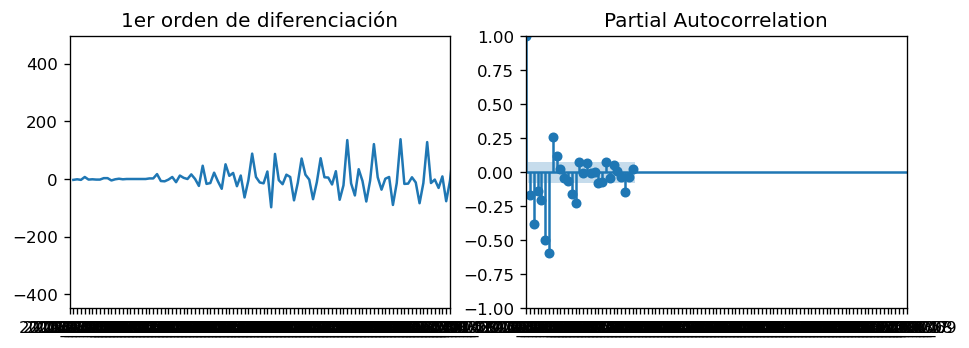

In [57]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_vd.diff()); axes[0].set_title("1er orden de diferenciación")
axes[1].set(xlim=(0,100))
plot_pacf(df_vd.diff().dropna(), ax=axes[1])
plt.show()

Se puede observar que el lag 1 está por debajo del límite (zona azul) por cual se concluye que **p=2**.

### Parametro (q)

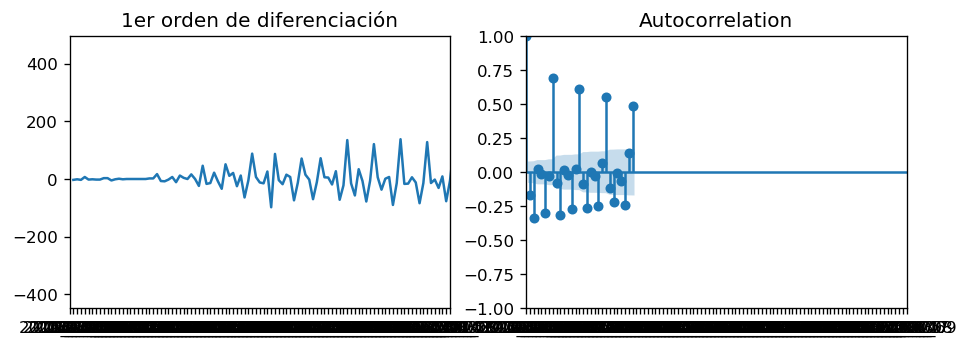

In [58]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_vd.diff()); axes[0].set_title('1er orden de diferenciación')
axes[1].set(xlim=(0,100))
plot_acf(df_vd.diff().dropna(), ax=axes[1])

plt.show()

Se puede observar que el lag 1 está por debajo del límite (zona azul) por cual se concluye que **q=2**.

### Variables 

Los siguientes serán los párametros para realizar el modelo arima  

**d = 1**
**p = 2**
**q = 2**

### Tabla ARIMA

In [59]:
model = ARIMA(df_vd, order=(1,2,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             aaaa_mm_dd   No. Observations:                  621
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -3847.029
Date:                Sun, 27 Nov 2022   AIC                           7702.058
Time:                        21:50:26   BIC                           7719.770
Sample:                             0   HQIC                          7708.943
                                - 621                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8520      0.061    -13.881      0.000      -0.972      -0.732
ma.L1         -0.0761      0.809     -0.094      0.925      -1.661       1.509
ma.L2         -0.9234      0.755     -1.223      0.2

C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Análisis de la media constante y la varianza

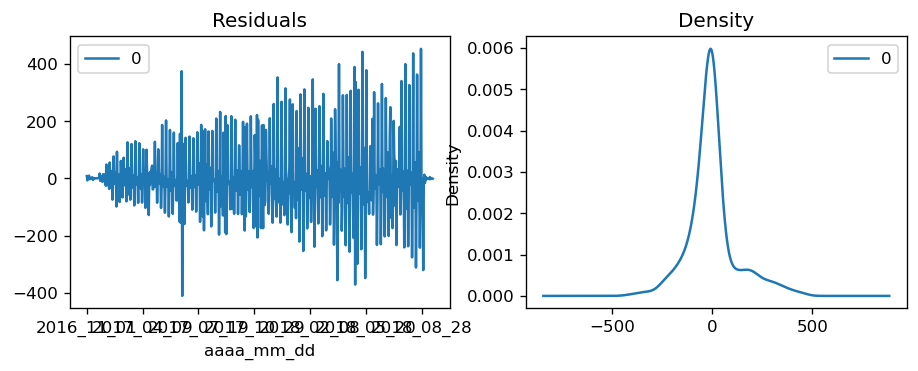

                0
count  621.000000
mean    -0.490094
std    120.481395
min   -410.501688
25%    -50.565491
50%     -7.617120
75%     21.312316
max    452.537396


In [60]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
print(residuals.describe())

Los errores residuales están cerca a cero y la varianza es uniforme.

### Gráfica actual vs ajustada

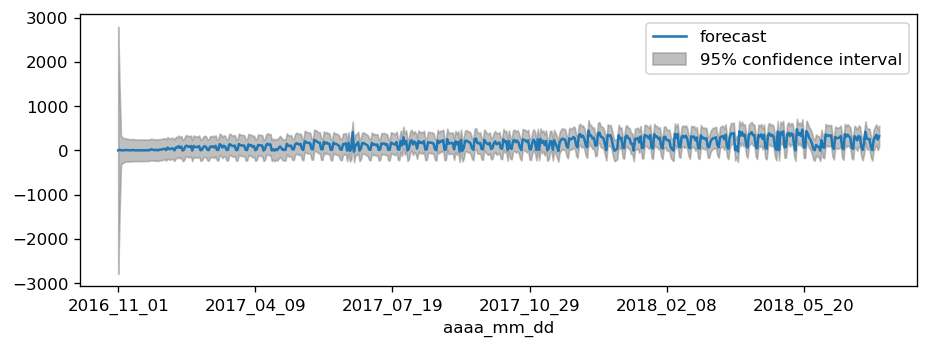

In [61]:
plot_predict(model_fit, "2016_11_01","2018_07_14", dynamic=False,)
plt.show()

La tendencia de los datos muestra un comportamientocreciente, donde se tiene en cuenta que el modelo pronosticado tiene un ajuste aceptable respecto al historico de los datos.

### - - Auto Arima/Datos Diarios

In [62]:
model = pm.auto_arima(df_vd, start_p=1, start_q=1,
                      test='adf',       # optimo 'd'
                      max_p=3, max_q=3, # maximo p y q
                      m=1,              # frecuencia de series
                      d=None,        
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7575.513, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8355.631, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7668.310, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7918.038, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7656.829, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7476.247, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=7811.054, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7475.146, Time=0.28 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=7455.088, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=7470.844, Time=0.38 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=7330.687, Time=0.54 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=7463.753, Time=0.37 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=7406.383, Time=0.67 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0]          
Total fit time: 3.383 seconds
                      

## Modelo óptimo ARIMA 

In [63]:
def parser(x):
    return datetime.strptime()

series = df_vd 

#Test de entrenamiento 

X = series.values
size = int(len(X) * 0.33)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

#Validación 

for t in range(len(test)):
    model = ARIMA(history, order=(3,0,3)) #Valores de auto ARIMA
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Pronostico=%f, Esperado=%f' % (yhat, obs))

C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=33.072877, Esperado=4.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=60.892473, Esperado=203.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=129.353441, Esperado=120.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=87.651737, Esperado=278.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=196.571410, Esperado=165.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=47.925680, Esperado=188.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=110.999061, Esperado=33.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=121.443340, Esperado=7.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=75.790731, Esperado=209.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=100.585782, Esperado=215.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=156.741113, Esperado=149.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=105.813578, Esperado=180.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=161.244571, Esperado=177.000000
Pronostico=118.383210, Esperado=36.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=40.689004, Esperado=205.000000
Pronostico=151.176180, Esperado=175.000000
Pronostico=128.711870, Esperado=176.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=132.167827, Esperado=167.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=133.122093, Esperado=196.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=134.746540, Esperado=39.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=148.026139, Esperado=3.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=113.769901, Esperado=185.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=129.261400, Esperado=176.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=144.406960, Esperado=172.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=125.202291, Esperado=169.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=136.736846, Esperado=153.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=147.449726, Esperado=32.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=98.122560, Esperado=1.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=114.936065, Esperado=214.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=129.175425, Esperado=179.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=102.046057, Esperado=194.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=143.174364, Esperado=213.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=115.901207, Esperado=221.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=142.806156, Esperado=36.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=147.006997, Esperado=2.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=137.628209, Esperado=253.000000
Pronostico=159.191004, Esperado=157.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=128.883710, Esperado=156.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=142.966003, Esperado=170.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=119.374702, Esperado=159.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=120.042158, Esperado=34.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=151.337183, Esperado=181.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=190.360293, Esperado=158.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=124.520361, Esperado=172.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=117.164521, Esperado=5.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=134.610645, Esperado=191.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=199.945941, Esperado=40.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=88.950171, Esperado=3.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=93.739851, Esperado=233.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=190.051890, Esperado=200.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=110.578650, Esperado=210.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=88.079556, Esperado=176.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=180.354099, Esperado=166.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=175.497863, Esperado=45.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=87.297168, Esperado=18.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=134.712462, Esperado=230.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=187.047916, Esperado=280.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=102.149399, Esperado=159.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=112.994714, Esperado=164.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=204.885077, Esperado=164.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=148.870577, Esperado=45.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=86.162833, Esperado=13.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=168.528324, Esperado=227.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=175.122559, Esperado=198.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=73.638826, Esperado=148.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=132.595832, Esperado=139.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=207.781335, Esperado=163.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=123.741704, Esperado=45.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=89.249333, Esperado=39.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=186.495330, Esperado=167.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=153.876795, Esperado=197.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=73.757082, Esperado=145.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=139.688434, Esperado=149.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=195.892057, Esperado=182.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=109.593649, Esperado=53.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=97.423598, Esperado=35.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=183.408820, Esperado=236.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=152.474555, Esperado=199.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=73.181059, Esperado=195.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=161.417436, Esperado=25.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=185.041044, Esperado=181.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=112.062439, Esperado=81.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=98.261664, Esperado=5.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=171.228313, Esperado=225.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=151.551074, Esperado=224.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=80.216681, Esperado=195.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=149.914554, Esperado=208.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=196.047885, Esperado=189.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=115.530832, Esperado=60.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=113.941836, Esperado=12.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=186.561217, Esperado=224.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=154.756702, Esperado=256.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=90.354077, Esperado=210.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=165.470941, Esperado=199.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=204.885333, Esperado=214.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=124.572077, Esperado=53.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=123.597763, Esperado=1.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=196.535789, Esperado=169.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=155.478345, Esperado=233.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=94.692267, Esperado=191.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=167.707204, Esperado=12.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=184.916547, Esperado=230.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=131.703128, Esperado=43.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=108.571910, Esperado=217.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=191.135377, Esperado=212.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=155.109723, Esperado=181.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=105.175230, Esperado=153.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=173.151298, Esperado=182.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=190.023662, Esperado=41.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=107.248374, Esperado=1.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=130.659316, Esperado=220.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=191.759570, Esperado=193.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=124.616139, Esperado=32.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=99.609358, Esperado=195.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=191.604833, Esperado=185.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=155.447921, Esperado=61.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=87.490690, Esperado=4.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=152.741202, Esperado=151.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=178.550669, Esperado=255.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=97.625730, Esperado=245.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=118.112613, Esperado=262.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=204.888594, Esperado=231.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=151.810917, Esperado=121.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=107.428247, Esperado=45.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=180.543238, Esperado=268.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=194.188983, Esperado=254.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=109.678156, Esperado=253.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=158.451823, Esperado=301.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=213.113119, Esperado=281.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=154.229147, Esperado=126.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=156.172244, Esperado=61.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=219.397513, Esperado=326.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=213.703888, Esperado=374.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=138.652969, Esperado=295.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=202.893481, Esperado=331.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=261.512140, Esperado=261.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=195.114598, Esperado=124.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=177.333252, Esperado=66.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=257.971773, Esperado=420.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=247.164379, Esperado=362.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=165.635860, Esperado=312.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=236.346504, Esperado=286.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=314.503453, Esperado=264.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=219.326345, Esperado=128.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=201.006777, Esperado=95.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=290.429229, Esperado=385.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=254.503398, Esperado=401.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=204.060570, Esperado=312.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=254.203538, Esperado=293.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=308.547097, Esperado=272.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=236.923381, Esperado=138.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=209.475602, Esperado=11.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=247.181989, Esperado=320.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=290.097288, Esperado=351.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=209.385239, Esperado=321.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=239.739309, Esperado=264.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=291.352937, Esperado=82.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=192.786021, Esperado=5.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=186.570417, Esperado=1.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=232.654101, Esperado=47.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=162.710916, Esperado=316.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=219.079667, Esperado=290.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=222.839687, Esperado=260.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=193.881421, Esperado=94.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=177.031585, Esperado=24.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=185.095567, Esperado=307.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=249.764998, Esperado=329.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=197.304411, Esperado=281.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=189.310751, Esperado=262.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=251.743417, Esperado=165.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=193.600649, Esperado=140.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=179.050117, Esperado=10.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=188.149920, Esperado=228.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=235.465944, Esperado=282.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=195.877963, Esperado=258.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=189.455075, Esperado=204.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=218.157218, Esperado=286.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=230.325247, Esperado=94.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=147.918977, Esperado=24.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=174.414563, Esperado=349.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=290.982592, Esperado=330.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=175.532100, Esperado=312.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=183.873434, Esperado=268.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=282.258617, Esperado=341.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=237.563542, Esperado=92.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=130.020155, Esperado=26.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=228.001864, Esperado=352.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=313.947823, Esperado=323.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=152.411139, Esperado=304.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=217.720472, Esperado=270.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=300.710939, Esperado=276.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=198.128057, Esperado=112.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=165.948559, Esperado=28.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=246.224375, Esperado=288.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=266.636154, Esperado=311.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=179.741489, Esperado=239.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=216.506604, Esperado=221.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=264.132036, Esperado=229.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=201.669424, Esperado=78.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=166.505125, Esperado=18.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=216.057427, Esperado=2.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=175.654845, Esperado=341.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=245.961254, Esperado=311.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=211.183596, Esperado=340.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=208.411942, Esperado=132.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=190.244379, Esperado=36.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=174.138121, Esperado=312.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=270.058420, Esperado=318.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=207.631146, Esperado=301.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=186.601532, Esperado=320.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=274.287677, Esperado=281.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=228.676773, Esperado=111.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=150.494607, Esperado=49.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=220.290371, Esperado=297.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=289.403701, Esperado=319.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=183.791278, Esperado=296.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=214.070365, Esperado=246.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=272.308184, Esperado=272.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=214.945935, Esperado=89.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=158.451222, Esperado=18.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=220.773216, Esperado=336.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=297.700490, Esperado=278.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=166.969703, Esperado=280.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=213.044451, Esperado=258.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=285.241993, Esperado=269.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=202.421006, Esperado=95.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=156.706255, Esperado=54.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=234.575431, Esperado=199.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=238.994596, Esperado=242.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=176.664913, Esperado=279.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=237.888492, Esperado=275.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=247.152474, Esperado=296.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=205.315742, Esperado=135.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=187.213020, Esperado=62.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=201.877554, Esperado=276.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=257.234290, Esperado=319.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=215.069159, Esperado=316.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=217.302563, Esperado=258.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=244.663915, Esperado=338.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=255.458221, Esperado=122.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=163.360211, Esperado=17.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=188.026493, Esperado=278.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=305.058829, Esperado=376.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=223.528847, Esperado=384.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=208.729374, Esperado=384.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=310.604670, Esperado=34.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=148.918188, Esperado=61.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=190.292597, Esperado=4.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=246.818048, Esperado=372.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=264.847105, Esperado=382.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=212.994707, Esperado=365.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=252.997360, Esperado=367.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=279.535177, Esperado=322.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=230.349906, Esperado=175.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=205.962577, Esperado=33.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=208.638818, Esperado=353.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=311.209638, Esperado=371.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=243.260339, Esperado=411.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=243.973135, Esperado=344.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=296.758083, Esperado=344.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=273.184918, Esperado=114.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=178.800080, Esperado=31.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=225.332723, Esperado=334.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=341.987926, Esperado=321.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=212.295174, Esperado=348.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=240.713023, Esperado=273.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=308.447279, Esperado=331.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=255.368637, Esperado=95.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=165.576471, Esperado=10.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=232.611572, Esperado=342.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=342.913687, Esperado=380.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=222.380069, Esperado=333.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=227.727997, Esperado=343.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=334.314264, Esperado=317.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=246.928533, Esperado=102.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=160.291413, Esperado=8.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=249.587081, Esperado=398.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=360.859562, Esperado=55.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=87.436794, Esperado=342.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=292.173143, Esperado=419.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=381.131722, Esperado=381.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=155.244886, Esperado=132.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=199.466905, Esperado=21.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=308.327900, Esperado=381.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=278.906753, Esperado=377.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=212.746665, Esperado=343.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=283.923188, Esperado=363.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=301.332019, Esperado=377.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=246.140960, Esperado=113.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=213.926530, Esperado=3.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=235.902399, Esperado=440.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=351.752497, Esperado=386.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=231.702167, Esperado=360.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=239.849635, Esperado=357.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=345.354936, Esperado=434.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=295.204462, Esperado=120.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=164.426106, Esperado=21.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=267.450136, Esperado=441.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=407.639723, Esperado=368.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=195.044283, Esperado=291.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=224.764732, Esperado=233.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=365.680055, Esperado=164.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=209.908786, Esperado=32.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=168.360120, Esperado=2.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=296.441643, Esperado=114.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=234.313441, Esperado=100.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=159.272598, Esperado=77.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=241.603018, Esperado=7.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=188.306544, Esperado=204.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=208.270127, Esperado=102.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=190.436482, Esperado=36.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=164.816204, Esperado=360.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=264.362738, Esperado=328.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=204.044018, Esperado=336.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=196.201247, Esperado=328.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=270.801088, Esperado=335.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=240.536589, Esperado=108.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=146.551325, Esperado=19.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=207.772568, Esperado=294.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=306.711090, Esperado=282.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=173.756372, Esperado=272.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=193.966436, Esperado=291.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=302.583772, Esperado=317.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=222.016379, Esperado=94.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=131.127787, Esperado=10.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=234.593253, Esperado=354.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=320.229526, Esperado=319.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=159.136301, Esperado=340.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=226.699951, Esperado=331.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=316.498987, Esperado=274.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=188.346603, Esperado=80.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=159.397532, Esperado=16.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=257.176707, Esperado=312.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=282.342669, Esperado=298.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=171.063373, Esperado=226.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=221.463138, Esperado=319.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=307.189799, Esperado=310.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=205.883512, Esperado=104.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=153.161347, Esperado=9.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=244.668532, Esperado=152.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=245.426223, Esperado=409.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=243.305436, Esperado=284.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=209.104446, Esperado=240.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=232.241288, Esperado=264.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=253.468891, Esperado=79.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=163.694159, Esperado=8.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=178.432190, Esperado=206.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=287.659324, Esperado=308.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=215.673941, Esperado=342.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=199.516533, Esperado=257.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=254.366744, Esperado=303.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=246.426296, Esperado=88.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=141.725455, Esperado=6.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=191.282975, Esperado=61.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=236.910486, Esperado=14.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=126.066919, Esperado=6.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=153.525231, Esperado=11.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=197.041621, Esperado=203.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=191.312926, Esperado=80.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=112.308243, Esperado=1.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=140.618515, Esperado=346.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=286.488451, Esperado=382.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=152.176564, Esperado=324.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=210.379990, Esperado=360.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=153.785510, Esperado=342.000000
Pronostico=130.184081, Esperado=107.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=129.936762, Esperado=4.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=171.797870, Esperado=416.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=283.723057, Esperado=327.000000
Pronostico=307.329035, Esperado=267.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=247.013515, Esperado=311.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=175.497854, Esperado=314.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=147.189304, Esperado=89.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=149.046499, Esperado=9.000000
Pronostico=198.089173, Esperado=354.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=302.306483, Esperado=340.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=326.506708, Esperado=321.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=267.946743, Esperado=347.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=190.340384, Esperado=363.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=159.588663, Esperado=92.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=158.702289, Esperado=3.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=210.493738, Esperado=455.000000
Pronostico=338.633909, Esperado=372.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=361.092868, Esperado=375.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=301.264360, Esperado=360.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=208.477955, Esperado=395.000000
Pronostico=175.975083, Esperado=106.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=181.051390, Esperado=2.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=238.636724, Esperado=395.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=363.478397, Esperado=394.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=394.533131, Esperado=317.000000
Pronostico=313.544964, Esperado=404.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=221.978831, Esperado=358.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=176.533537, Esperado=103.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=177.768032, Esperado=7.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=247.854359, Esperado=458.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=389.603641, Esperado=410.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=413.125261, Esperado=375.000000
Pronostico=330.993565, Esperado=374.000000
Pronostico=223.495860, Esperado=27.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=129.067398, Esperado=6.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=161.960125, Esperado=17.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=262.344720, Esperado=3.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=339.368908, Esperado=5.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=315.789474, Esperado=2.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=186.299748, Esperado=1.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=23.043844, Esperado=3.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=-33.591822, Esperado=1.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=9.558734, Esperado=3.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=94.205128, Esperado=2.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=153.511443, Esperado=1.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=138.048268, Esperado=4.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=57.149992, Esperado=3.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=-27.302621, Esperado=1.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=-62.944842, Esperado=2.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=-23.645830, Esperado=1.000000
Pronostico=45.209448, Esperado=1.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


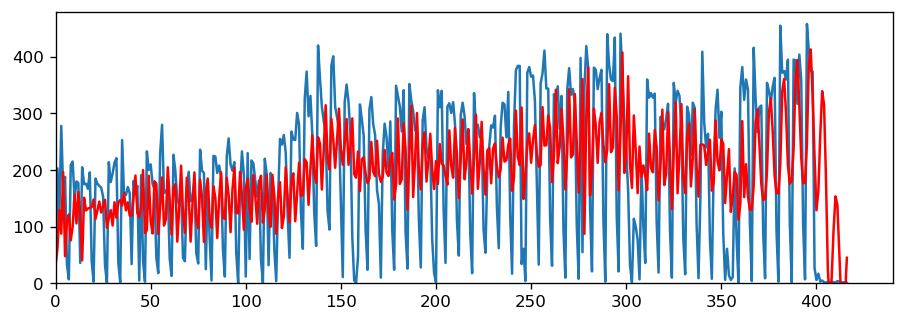

Test RMSE: 111.216


In [64]:
# Gráfica pronóstico vs datos 
plt.plot(test)
plt.plot(predictions, color='red')
plt.ylim(0,480)
plt.xlim(0,440)
plt.show()
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

### Conclusiones - Análisis Diario

De la serie de tiempo de ventas E - commerce Brasil

1. Al tomar los valores óptimos de los parametros d,p,q gracias a auto arima respecto a valores dados por el análisis de validación cruzada, se nota un valor de error cuadrático medio de 11.812 más bajo que 359  respecto a valor resultante de los datos semanales, por lo cual se puede decir que el prónostico es más confiable cuando se usan métodos que proporcionen el parametro óptimo y cuando se usan mayor cantidad de datos en la muestra.

### - - Modelo Arima/Datos Semanales

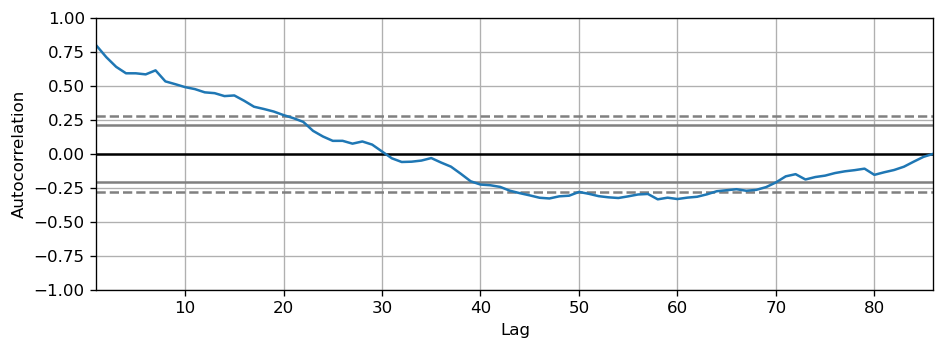

In [65]:
#Correlación de la serie de tiempo --- Grafica 1
def parser(x):
    return datetime.strptime('2017_02'+x, '%Y_%m')
 
series = df_vs 
autocorrelation_plot(series)
plt.show()

                               SARIMAX Results                                
Dep. Variable:            Year_Semana   No. Observations:                   86
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -595.928
Date:                Sun, 27 Nov 2022   AIC                           1199.856
Time:                        21:53:58   BIC                           1209.579
Sample:                             0   HQIC                          1203.764
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2836      0.126      2.251      0.024       0.037       0.531
ma.L1         -1.8761      1.014     -1.850      0.064      -3.864       0.112
ma.L2          0.8764      0.867      1.011      0.3

C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


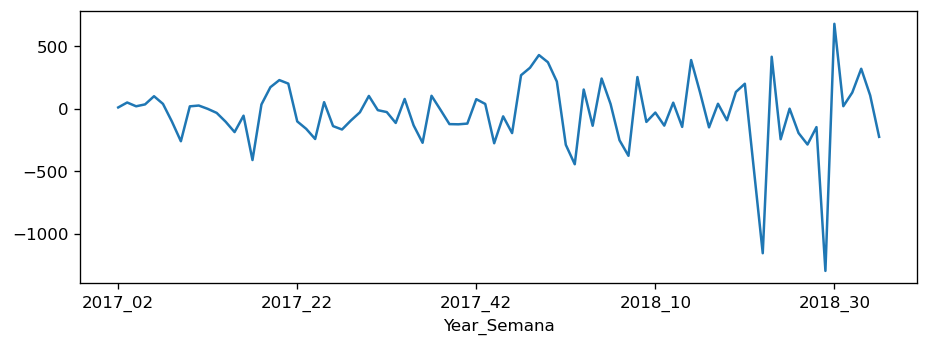

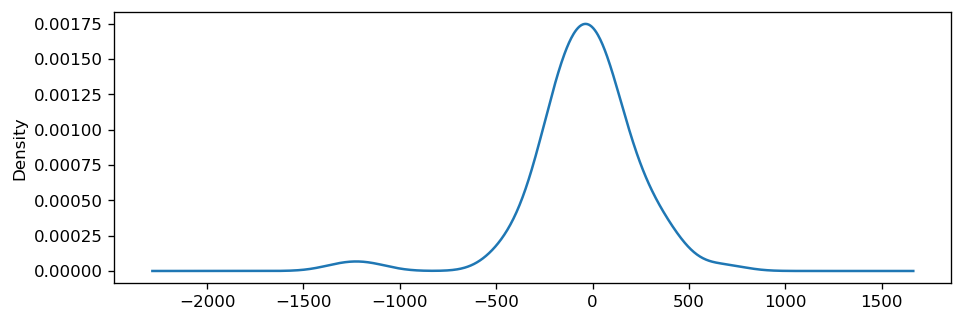

count      86.000000
mean      -41.099644
std       276.966399
min     -1296.985732
25%      -147.655460
50%       -20.261310
75%       100.483010
max       677.279575
dtype: float64


In [66]:
#Arima
def parser(x):
	return datetime.strptime('2017_02'+x, '%Y_%m')
 
series = df_vs 

# fit model
model = ARIMA(series, order=(1,2,2)) 
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = model_fit.resid
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [67]:
def parser(x):
    return datetime.strptime('2017_02'+x,'%Y-%m')

series = df_vs 

#Test de entrenamiento 

X = series.values
size = int(len(X) * 0.33)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

#Validación 

for t in range(len(test)):
    model = ARIMA(history, order=(1,2,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Pronostico=%f, Esperado=%f' % (yhat, obs))

Pronostico=852.459390, Esperado=994.000000
Pronostico=1039.164805, Esperado=966.000000
Pronostico=986.053526, Esperado=961.000000
Pronostico=1003.360247, Esperado=888.000000
Pronostico=905.131468, Esperado=1059.000000
Pronostico=1101.872231, Esperado=929.000000
Pronostico=952.693035, Esperado=750.000000
Pronostico=781.207076, Esperado=1048.000000
Pronostico=1071.558601, Esperado=1055.000000
Pronostico=1087.803302, Esperado=959.000000
Pronostico=976.208779, Esperado=928.000000
Pronostico=959.836428, Esperado=922.000000
Pronostico=936.815549, Esperado=1113.000000
Pronostico=1153.067095, Esperado=1157.000000
Pronostico=1165.403464, Esperado=878.000000
Pronostico=895.371368, Esperado=987.000000
Pronostico=1019.485106, Esperado=890.000000
Pronostico=891.684705, Esperado=1310.000000
Pronostico=1260.371593, Esperado=1544.000000
Pronostico=1548.142327, Esperado=1777.000000
Pronostico=1840.195145, Esperado=1867.000000
Pronostico=1880.331024, Esperado=1812.000000
Pronostico=1872.971133, Esperado

Test RMSE: 381.398


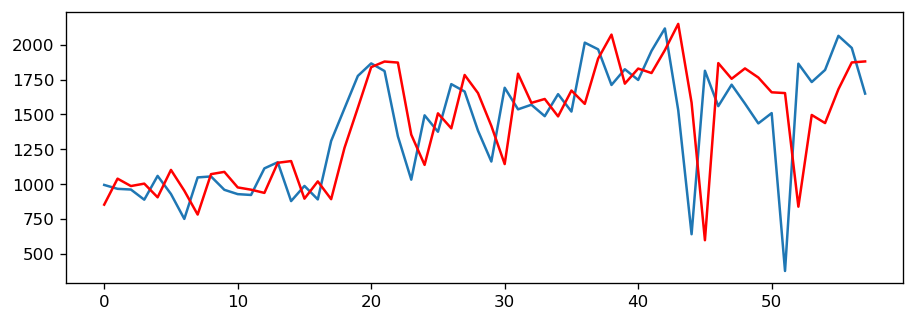

In [68]:
# Gráfica pronóstico vs datos 

plt.plot(test)
plt.plot(predictions, color='red')
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.show()

### - - Auto Arima/Datos Semanales

In [69]:
model = pm.auto_arima(df_vs, start_p=1, start_q=1,
                      test='adf',       # optimo 'd'
                      max_p=3, max_q=3, # maximo p y q
                      m=1,              # frecuencia de series
                      d=None,        
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1229.279, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1219.548, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1208.278, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1227.576, Time=0.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1205.956, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1208.182, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1206.865, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1208.407, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1210.127, Time=0.04 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.836 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   86
Model:               SARIMAX(0, 1, 2)   Log Likelihood             

### - - Auto Arima - Entrenamiento

In [70]:
def parser(x):
    return datetime.strptime()

series = df_vs

#Test de entrenamiento 

X = series.values
size = int(len(X) * 0.33)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

#Validación 

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2)) #Valores de auto ARIMA
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Pronostico=%f, Esperado=%f' % (yhat, obs))

Pronostico=822.577111, Esperado=994.000000
Pronostico=1000.079394, Esperado=966.000000
Pronostico=958.198263, Esperado=961.000000
Pronostico=962.249791, Esperado=888.000000
Pronostico=885.836000, Esperado=1059.000000
Pronostico=1062.211841, Esperado=929.000000
Pronostico=924.846324, Esperado=750.000000
Pronostico=770.255437, Esperado=1048.000000
Pronostico=1050.443355, Esperado=1055.000000
Pronostico=1001.689282, Esperado=959.000000
Pronostico=963.200324, Esperado=928.000000
Pronostico=941.062522, Esperado=922.000000
Pronostico=932.164745, Esperado=1113.000000
Pronostico=1094.908384, Esperado=1157.000000
Pronostico=1107.862245, Esperado=878.000000
Pronostico=888.909393, Esperado=987.000000
Pronostico=1032.909477, Esperado=890.000000
Pronostico=891.976018, Esperado=1310.000000
Pronostico=1236.124858, Esperado=1544.000000
Pronostico=1407.088618, Esperado=1777.000000
Pronostico=1781.182456, Esperado=1867.000000
Pronostico=1875.535649, Esperado=1812.000000
Pronostico=1809.933062, Esperado=

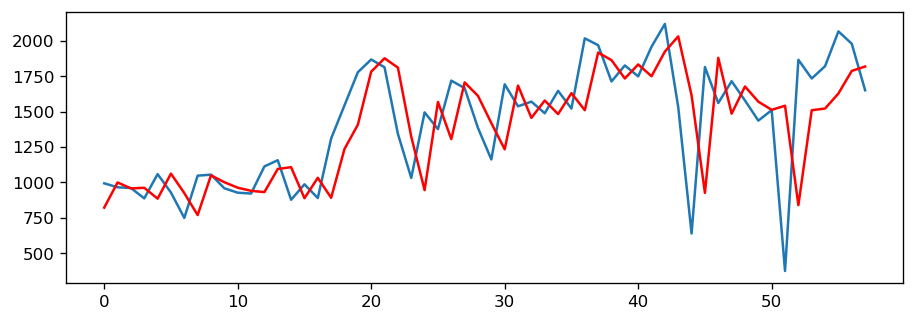

Test RMSE: 354.795


In [71]:
# Gráfica pronóstico vs datos 
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

### Conclusiones - Análisis semanal 

De la serie de tiempo de ventas E - commerce Brasil

1. Al tomar los valores optimos de los parametros d,p,q gracias a auto arima respecto a valores dados por el analisis de validación cruzada, se nota un valor de error cuadratico medio de 359 más bajo respecto a valor resultante de la validación cruzada, por lo cual se puede decir que el prónostico es más confiable. 

### - - Modelo Sarima/Datos Semanales

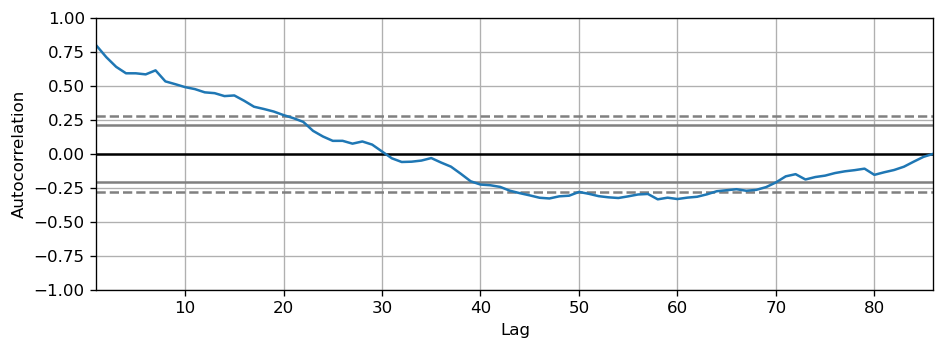

In [72]:
#Correlación de la serie de tiempo --- Grafica 1
def parser(x):
    return datetime.strptime('2017_02'+x, '%Y_%m')
 
series = df_vs 
autocorrelation_plot(series)
plt.show()

C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Year_Semana   No. Observations:                   86
Model:                ARIMA(20, 1, 0)   Log Likelihood                -594.782
Date:                Sun, 27 Nov 2022   AIC                           1231.563
Time:                        21:54:05   BIC                           1282.859
Sample:                             0   HQIC                          1252.196
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4633      0.111     -4.169      0.000      -0.681      -0.246
ar.L2         -0.3824      0.159     -2.400      0.016      -0.695      -0.070
ar.L3         -0.2989      0.170     -1.761      0.0

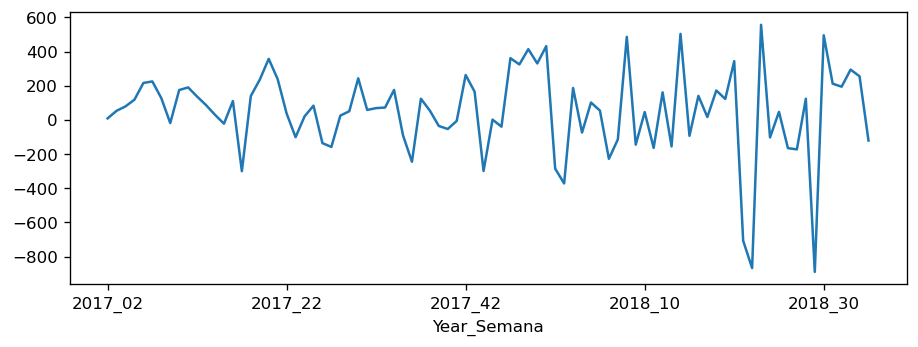

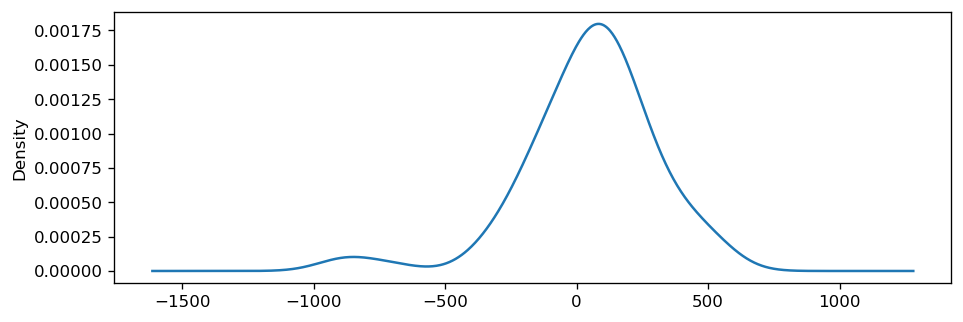

count     86.000000
mean      48.861769
std      256.681873
min     -890.124468
25%      -86.027793
50%       63.834134
75%      189.504989
max      557.049828
dtype: float64


In [73]:
#Sarima
def parser(x):
	return datetime.strptime('2017_02'+x, '%Y_%m')
 
series = df_vs 

# fit model
model = ARIMA(series, order=(20,1,0)) # 20 lag de autoregresión, 1 serie de tiempo estacional, 0 modelo de promedio movil 
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = model_fit.resid
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [74]:
def parser(x):
    return datetime.strptime('2017_02'+x,'%Y-%m')

series = df_vs 

#Test de entrenamiento 

X = series.values
size = int(len(X) * 0.33)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

#Validación 

for t in range(len(test)):
    model = ARIMA(history, order=(20,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Pronostico=%f, Esperado=%f' % (yhat, obs))

C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=1198.509413, Esperado=994.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=1043.548637, Esperado=966.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=692.821694, Esperado=961.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=3.247605, Esperado=888.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=1200.391404, Esperado=1059.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=743.928580, Esperado=929.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=1207.243710, Esperado=750.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=926.558912, Esperado=1048.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=0.000000, Esperado=1055.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=1290.935027, Esperado=959.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=775.809074, Esperado=928.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=0.000000, Esperado=922.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=1227.690200, Esperado=1113.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=1326.525893, Esperado=1157.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=1299.094704, Esperado=878.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=871.015466, Esperado=987.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=1250.781304, Esperado=890.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=977.923380, Esperado=1310.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=1110.946229, Esperado=1544.000000


C:\Users\Usuario-PC\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pronostico=1295.904743, Esperado=1777.000000
Pronostico=1608.335172, Esperado=1867.000000
Pronostico=1560.715146, Esperado=1812.000000
Pronostico=1812.728753, Esperado=1343.000000
Pronostico=1236.275766, Esperado=1032.000000
Pronostico=963.960110, Esperado=1494.000000
Pronostico=1612.127434, Esperado=1376.000000
Pronostico=1733.190507, Esperado=1718.000000
Pronostico=1688.947517, Esperado=1665.000000
Pronostico=1639.804825, Esperado=1384.000000
Pronostico=1528.886943, Esperado=1162.000000
Pronostico=1178.577365, Esperado=1692.000000
Pronostico=1718.914628, Esperado=1537.000000
Pronostico=1763.273222, Esperado=1570.000000
Pronostico=1835.877651, Esperado=1488.000000
Pronostico=1301.188750, Esperado=1646.000000
Pronostico=1663.790311, Esperado=1521.000000
Pronostico=1690.896296, Esperado=2016.000000
Pronostico=2029.967858, Esperado=1968.000000
Pronostico=1894.270462, Esperado=1712.000000
Pronostico=1719.075173, Esperado=1825.000000
Pronostico=1533.750930, Esperado=1748.000000
Pronostico=

In [75]:
#Evaluación del pronóstico Error cuadrático medio

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 490.051


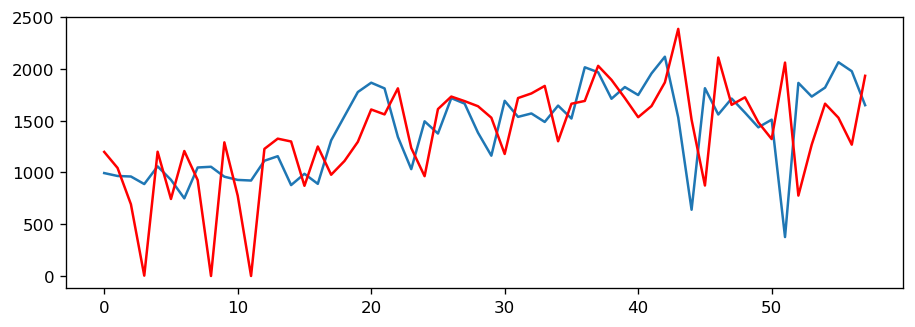

In [76]:
# Gráfica pronóstico vs datos 

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

### Conclusiones - Análisis Semanal

De la serie de tiempo de ventas E - commerce Brasil

1. Al tomar d = 1 bajo la hipótesis de tener estacionalidad, se nota un valor de error cuadratico medio de 569,842 más bajo respecto a d = 0 bajo la hipótesis de no tener estacionaidad con un valor de 1153,397.

2. Bajo la hipótesis de tener estacionalidad el valor de AIC (criterio de Información de Akaike) es más bajo 1234,693  respecto al valor bajo la hipótesis de no tener estacionalidad 1259,375.

3. Bajo el método de validación cruzada cambiando los valores p,d,q se podrá encontrar un mejor prónostico solo si se tiene como parametro fijo a d = 1.